<a href="https://colab.research.google.com/github/nahidosen/1821168042_CSE445_Spring21/blob/main/Regression_Task_Daily_Demand_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


e) Exploratory Data Analysis (EDA) and all the necessary data preparation

f) Use any of the regression methods to build a predictor for predicting the daily demand of TV Models.

g) Use proper evaluation parameters that have been discussed in the class to evaluate your result.

h) Submit your code in an ipython notebook format in your Github repository and generate a report describing all of the above mentioned.

In [73]:
!pip install scikit-plot

In [74]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [95]:
# Importing dataset csv file

tv_data = 'https://raw.githubusercontent.com/nahidosen/1821168042_CSE445_Spring21/main/datasets/tv_sale.csv?token=ASXWIV7AIZ7IMA4TYPVGNCLAVJNYC'
tv_df = pd.read_csv(tv_data)

In [76]:
tv_df

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57
...,...,...,...
46111,01-Jan-14,M74,1
46112,01-Jan-14,M59,1
46113,01-Jan-14,M60,5
46114,01-Jan-14,M54,1


In [77]:
tv_df.head(30)

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57
5,31-Aug-16,M100,59
6,31-Aug-16,M5,17
7,31-Aug-16,M14,653
8,31-Aug-16,M62,8
9,31-Aug-16,M15,25


In [78]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [79]:
tv_df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


In [80]:
tv_df.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

In [81]:
tv_df.nunique()

Date      971
Model     124
Count    1191
dtype: int64

In [101]:
tv_df['Date'] = pd.to_datetime(tv_df['Date'])

In [102]:
tv_df['Year'] = tv_df['Date'].dt.year
tv_df['Month'] = tv_df['Date'].dt.month
tv_df['Day'] = tv_df['Date'].dt.day

In [103]:
tv_df.columns

Index(['Date', 'Model', 'Count', 'Year', 'Month', 'Day'], dtype='object')

In [127]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    46116 non-null  datetime64[ns]
 1   Model   46116 non-null  object        
 2   Count   46116 non-null  int64         
 3   Year    46116 non-null  int64         
 4   Month   46116 non-null  int64         
 5   Day     46116 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.1+ MB


In [104]:
tv_df

,Date,Model,Count,Year,Month,Day
0,2016-08-31,M45,5,2016,8,31
1,2016-08-31,M121,3,2016,8,31
2,2016-08-31,M122,4,2016,8,31
3,2016-08-31,M91,10,2016,8,31
4,2016-08-31,M66,57,2016,8,31
...,...,...,...,...,...,...
46111,2014-01-01,M74,1,2014,1,1
46112,2014-01-01,M59,1,2014,1,1
46113,2014-01-01,M60,5,2014,1,1
46114,2014-01-01,M54,1,2014,1,1


In [110]:
print(min(tv_df['Date']))
print(max(tv_df['Date']))

2014-01-01 00:00:00
2016-08-31 00:00:00


In [85]:
tv_df["Date"].value_counts()

2016-08-08    99
2016-08-14    95
2016-08-31    94
2016-08-04    94
2016-08-19    94
              ..
2014-01-07     2
2014-01-14     2
2014-01-04     2
2014-01-03     1
2014-01-12     1
Name: Date, Length: 971, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


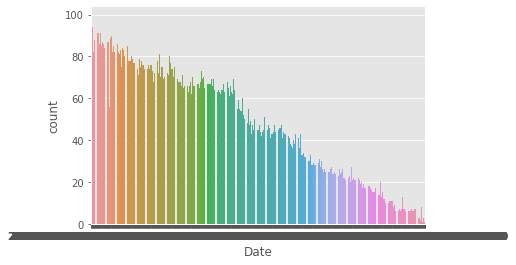

In [105]:
sns.countplot(tv_df["Date"])

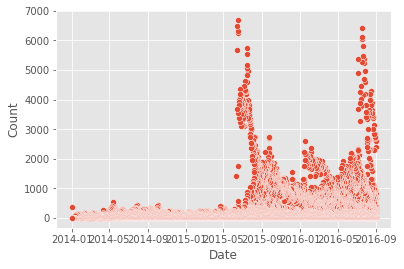

In [87]:
sns.scatterplot(data=tv_df, x="Date", y="Count")

In [88]:
tv_df["Model"].value_counts()

M119    926
M70     778
M97     770
M88     769
M43     748
       ... 
M14      13
M84      10
M42       2
M47       1
M12       1
Name: Model, Length: 124, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


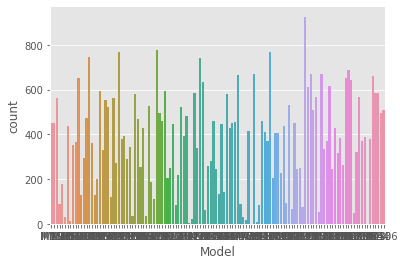

In [89]:
sns.countplot(tv_df["Model"])

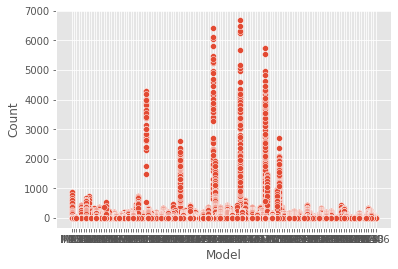

In [90]:
sns.scatterplot(data=tv_df, x="Model", y="Count")

In [91]:
tv_df["Count"].value_counts()

1       6141
2       3697
3       2566
4       1913
5       1475
        ... 
1295       1
1071       1
847        1
751        1
3374       1
Name: Count, Length: 1191, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


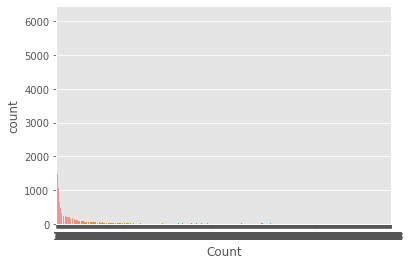

In [92]:
sns.countplot(tv_df["Count"])

In [93]:
tv_df.sort_values(by='Count', ascending=False)

,Date,Model,Count,Day,Month,Year
32322,2015-06-16,M24,6678,16,6,2015
32328,2015-06-15,M24,6482,15,6,2015
3992,2016-07-18,M23,6422,18,7,2016
32223,2015-06-17,M24,6328,17,6,2015
32217,2015-06-18,M24,6258,18,6,2015
...,...,...,...,...,...,...
18147,2016-01-17,M125,1,17,1,2016
18154,2016-01-17,M74,1,17,1,2016
18155,2016-01-17,M34,1,17,1,2016
39507,2015-01-05,M114,1,5,1,2015


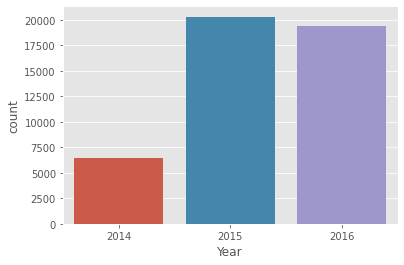

In [109]:
sns.countplot(x='Year', data=tv_df)

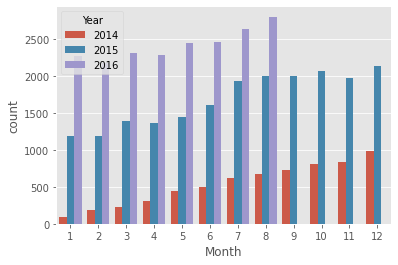

In [117]:
sns.countplot(data=tv_df, x="Month", hue="Year")

In [124]:
tv_df['Model'].unique()

array(['M45', 'M121', 'M122', 'M91', 'M66', 'M100', 'M5', 'M14', 'M62',
       'M15', 'M61', 'M82', 'M108', 'M55', 'M43', 'M31', 'M90', 'M96',
       'M69', 'M76', 'M56', 'M92', 'M72', 'M94', 'M8', 'M97', 'M71',
       'M57', 'M107', 'M99', 'M18', 'M30', 'M36', 'M86', 'M13', 'M73',
       'M81', 'M41', 'M79', 'M70', 'M110', 'M95', 'M51', 'M117', 'M22',
       'M10', 'M65', 'M115', 'M75', 'M124', 'M2', 'M42', 'M112', 'M27',
       'M53', 'M60', 'M120', 'M23', 'M4', 'M39', 'M48', 'M32', 'M87',
       'M6', 'M64', 'M68', 'M17', 'M7', 'M24', 'M44', 'M16', 'M77', 'M78',
       'M28', 'M12', 'M1', 'M84', 'M11', 'M25', 'M20', 'M105', 'M88',
       'M109', 'M21', 'M19', 'M40', 'M9', 'M116', 'M50', 'M67', 'M93',
       'M89', 'M63', 'M123', 'M119', 'M49', 'M52', 'M102', 'M85', 'M126',
       'M59', 'M38', 'M103', 'M74', 'M98', 'M37', 'M113', 'M125', 'M104',
       'M26', 'M35', 'M80', 'M127', 'M111', 'M118', 'M101', 'M58', 'M47',
       'M114', 'M54', 'M29', 'M34', 'M33', 'M106'], dtype=object)

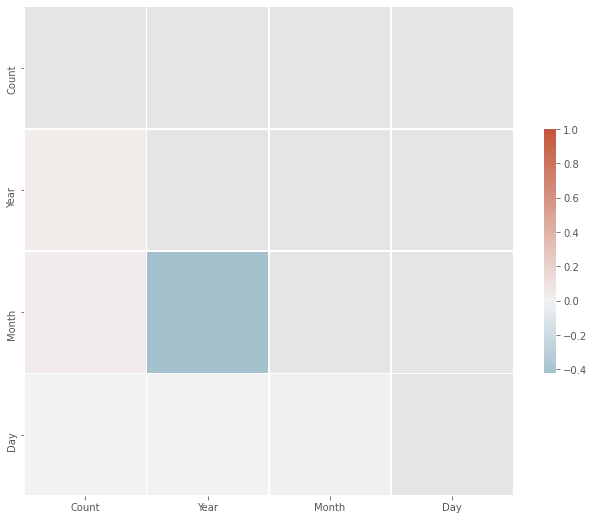

In [122]:
corr = tv_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [123]:
corr.style.background_gradient(cmap=cmap).set_precision(2)

,Count,Year,Month,Day
Count,1.00,0.04,0.03,-0.00
Year,0.04,1.00,-0.42,-0.00
Month,0.03,-0.42,1.00,0.01
Day,-0.00,-0.00,0.01,1.00
